# Data Science Project - Lending-Club-Loan

## Perkenalan

### Data

Saya menggunakan subset DataSet LendingClub dari website Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Latar Belakang

LendingClub adalah perusahaan pinjaman peer-to-peer AS, yang berkantor pusat di San Francisco, California. Perusahaan ini adalah perusahaan yang memberikan pinjaman secara peer-to-peer pertama dengan penawaran keamanan sebagai nilai jual yaitu dengan Securities and Exchange Commission (SEC), dan menawarkan perdagangan pinjaman di pasar sekunder. LendingClub adalah platform pinjaman peer-to-peer terbesar di dunia.

### Tujuan

Tujuan analasis ini adalah untuk memprediksi apakah seorang calon nasabah akan bisa membayar lunas hutang yang dipinjam atau tidak 

### Library yang digunakan

Numpy, Pandas, Matplotlib, Seaborn, Sklearn, Tensorflow-Keras

## Import dan Setting Library 

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

In [8]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [9]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [10]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [61]:
df = pd.read_csv('lending_club_loan_two.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis (EDA)

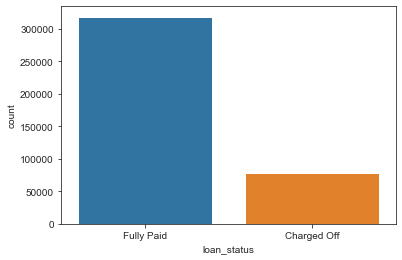

In [13]:
sns.countplot(x='loan_status',data=df)

bisa dilihat pada plot bahwa para peminjam di LendingClubLoan bisa membayar lunas (Fully Paid) uang yang mereka pinjam

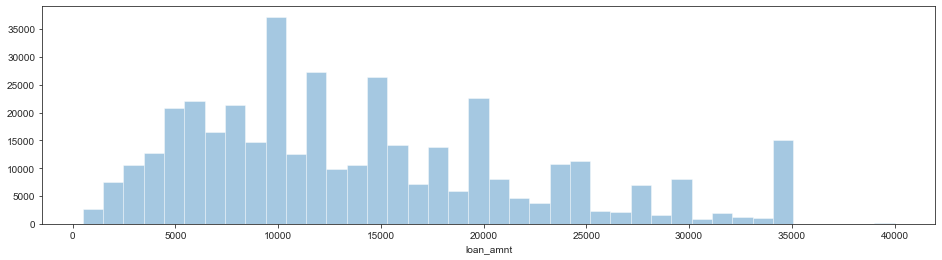

In [19]:
plt.figure(figsize=(16,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.show()

sebagian besar jumlah pinjaman ada pada angka $10.000 

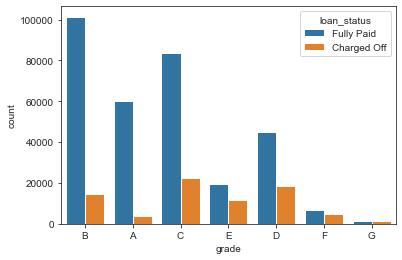

In [22]:
sns.countplot(x='grade',data=df,hue='loan_status')

berdasarkan ranking (grade) peminjam, ternyata banyak peminjam dengan grade B yang berhasil melunasi hutangnya

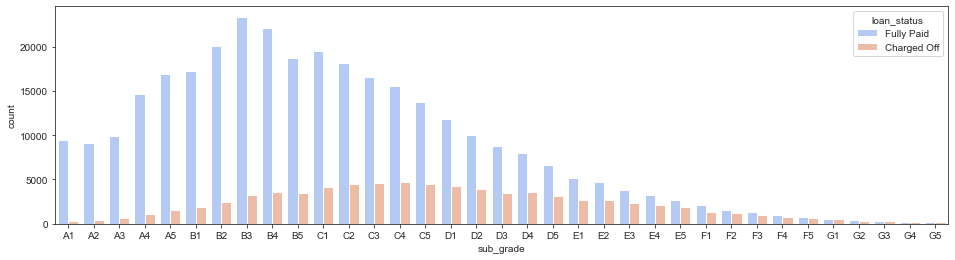

In [24]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

ranking lebih spesifiknya dijelas dalam sub_grade, dimana ternyata ranking peminjam F dan G jarang diberi pinjaman

In [27]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [62]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


disini saya melakukan transformasi tipe data untuk kemudahan proses modeling 

## Preprocessing Data

### Missing Data

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

ternyata banyak data kosong pada beberapa kolom, untuk lebih mudah nya saya menggunakan persentase

In [34]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

bisa dilihat bahwa emp_title (5,79%) dan emp_length (4,62%) mengalami missing data cukup besar, sehingga disini saya melakukan analisa apakah data ini bisa di modifikasi atau di eleminasi

In [50]:
print('emp_title :')
feat_info('emp_title')
print('\n')
print('emp_length :')
feat_info('emp_length')

emp_title :
The job title supplied by the Borrower when applying for the loan.*


emp_length :
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


ternyata emp_title hanya menunjukan data pekerjaan yang kemungkinan data tersebut kurang berpengaruh untuk analisa data selanjutnya, sehingga data emp_title lebih baik dieliminasi

In [66]:
df = df.drop('emp_title',axis=1)

In [51]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

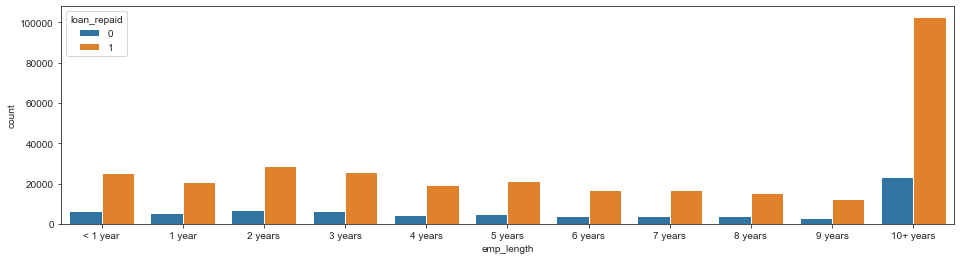

In [56]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize=(16,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_repaid')

saya akan mencoba menganalisa lama bekerja peminjam terhadap jumlah peminjam, dimana bisa dilihat bahwa sebagian besar peminjam sudah bekerja lebih dari 10 tahun, tapi ini belum menjelaskan secara utuh

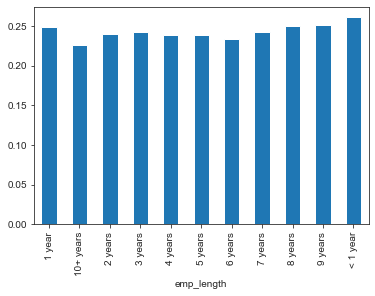

In [70]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len.plot(kind='bar')

dari grafik ini bisa dilihat bahwa emp_length tidak berpengaruh nyata terhadap nilai loan_status, sehingga emp_length juga lebih baik dieleminasi

In [71]:
df = df.drop('emp_length',axis=1)

In [72]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [74]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [73]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

setelah melakukan analisa missing data untuk kolom title ternyata kolom tersebut memiliki data yang sama dengan kolom purpose

sehingga kolom title bisa di eleminasi

In [75]:
df = df.drop('title',axis=1)

missing terbanyak selanjutnya adalah mort_acc, dimana mort_acc adalah

In [76]:
feat_info('mort_acc')

Number of mortgage accounts.


In [77]:
print("Korelasi dengan kolom mort_acc")
df.corr()['mort_acc'].sort_values()

Korelasi dengan kolom mort_acc


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

bisa dilihat ternya mort_acc cukup berhubungan dengan total_acc

In [78]:
print("Rata-rata nilai kolom mort_acc per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Rata-rata nilai kolom mort_acc per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

karena data ini berkorelasi, sehingga rata-rata data mort_acc per total_acc saya gunakan untuk mengisi missing data pada mort_acct_acc 

In [81]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [82]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

sisanya saya drop semua data missing

In [84]:
df = df.dropna()

In [85]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Data

In [86]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

disini saya cek tipe data objek pada dataframe

In [87]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

kolom term mengandung int, sehingga saya convert dengan menghilangkan label int

In [89]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

TypeError: 'int' object is not subscriptable

karena grade dan sub_grade hampir sama, maka saya drop data grade dan data sub_grade saya masukan ke dataframe

In [90]:
df = df.drop('grade',axis=1)

In [91]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [92]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [93]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

begitu pun untuk data objek yang kurang berhubungan saya jadikan data dummy

In [94]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

sedangkan data address dan zip saya gabungkan untuk data dummy nya

In [97]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

untuk home_ownership, saya mencoba menggabungkan NONE dan ANY dengan OTHER untuk merampingkan data 

In [95]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [96]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [98]:
df = df.drop('issue_d',axis=1)

In [99]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [101]:
df = df.drop('loan_status',axis=1)

cek status untuk memastikan tidak ada data objek lagi 

In [110]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## Treating Data

### Training Data

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [105]:
scaler = MinMaxScaler()

In [106]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling Data

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [109]:
df.shape

(395219, 79)

disini saya menggunakan NN untuk input layer adalah 78 dan untuk hidden layer adalah layer sebelumnya dibagi 2 dengan metode aktivasi relu, dengan output layernya 1  dengan metode aktivasi sigmoid.

In [112]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

fitting model data dengan komposisi sebagai berikut

In [113]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.3296 - val_loss: 0.2659
Epoch 2/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2752 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2691 - val_loss: 0.2635
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2659 - val_loss: 0.2638
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2650 - val_loss: 0.2626
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2641 - val_loss: 0.2621
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2634 - val_loss: 0.2624
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2630 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2628 - val_loss: 0.2623
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.262

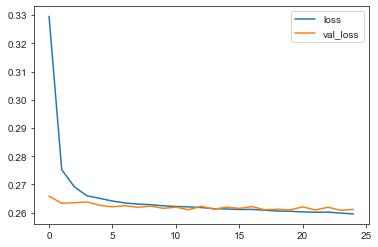

In [114]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [117]:
predictions = model.predict_classes(X_test)

### Evaluasi Data

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [119]:
confusion_matrix(y_test,predictions)

array([[ 6884,  8774],
       [  120, 63266]], dtype=int64)

model yang saya buat memiliki ketepatan 89% untuk prediksi calon peminjam dana bisa membayarnya hutangnya

untuk mencoba modelnya saya menggunakan data random pada dataset saya

### Tes data hasil modelling

In [123]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [124]:
df.iloc[random_ind]['loan_repaid']

1.0

menggunakan hasil data modelling, saya yakin 89% orang tersebut mampu membayar kembali dana yang dia pinjam 

# Terima Kasih